# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [3]:
import scipy.io
mat = scipy.io.loadmat('data/ejer_1_data1.mat')

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [6]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [7]:
X = mat['X']
y = mat['y'].ravel()  # Convertimos a vector 1D para facilidad

# Crear el DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y



#### 4. Plot a scatterplot with the data

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

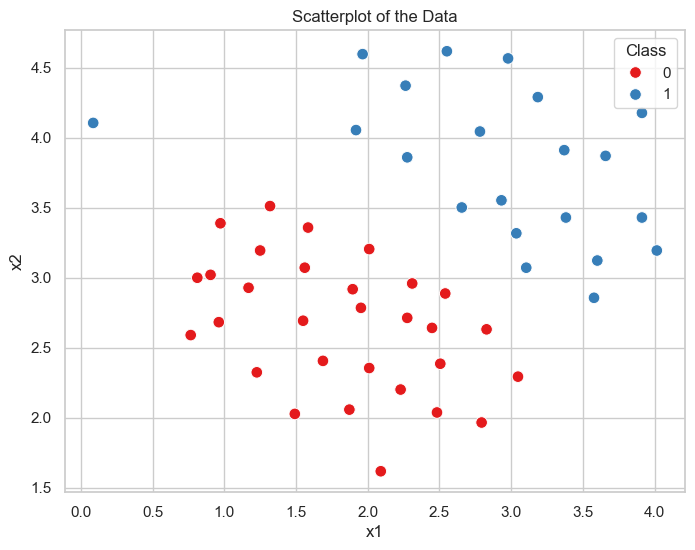

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='Set1', s=70)
plt.title('Scatterplot of the Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Class')
plt.show()


#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [9]:
from sklearn.svm import LinearSVC

# Crear y ajustar el modelo
model = LinearSVC(C=1, loss='hinge', max_iter=10000)
model.fit(X, y)


LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [10]:
# Accuracy sobre el conjunto de entrenamiento
score_c1 = model.score(X, y)
print(f"Accuracy con C=1: {score_c1:.2f}")


Accuracy con C=1: 0.98


It appears that it mis-classified the outlier.



#### 7. Increase the value of C until you get a perfect classifier
This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.



In [11]:
# Nuevo modelo con C grande
model_c_high = LinearSVC(C=1000, loss='hinge', max_iter=10000)
model_c_high.fit(X, y)

# Evaluar precisión
score_c_high = model_c_high.score(X, y)
print(f"Accuracy con C=1000: {score_c_high:.2f}")


Accuracy con C=1000: 1.00


c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

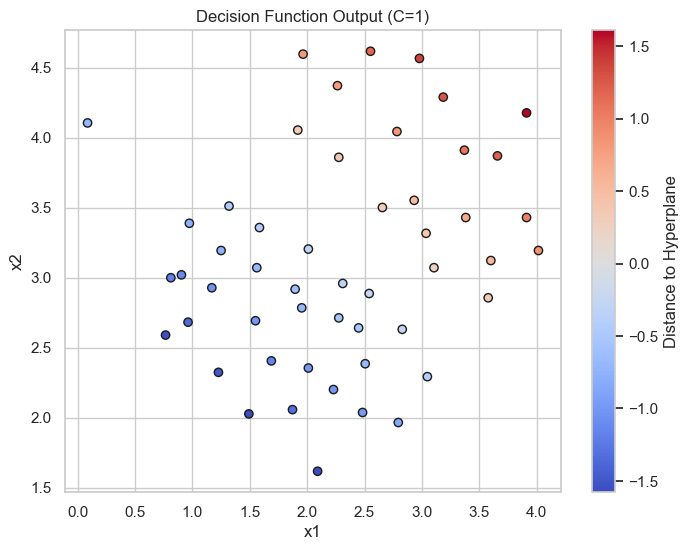

In [12]:
# Obtener valores de decision_function
decision_values_c1 = model.decision_function(X)

# Crear scatterplot con color según distancia al hiperplano
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=decision_values_c1, cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Distance to Hyperplane')
plt.title('Decision Function Output (C=1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

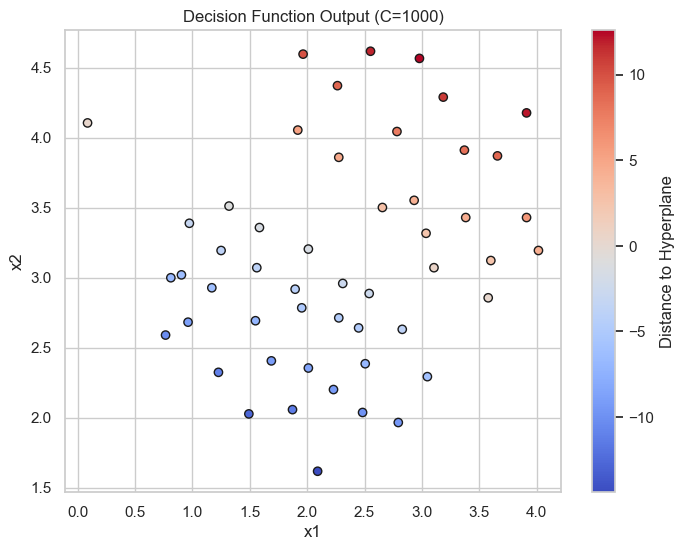

In [13]:
decision_values_c_high = model_c_high.decision_function(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=decision_values_c_high, cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Distance to Hyperplane')
plt.title('Decision Function Output (C=1000)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


#### 1. Load the data `ejer_1_data2.mat`

In [14]:
mat = scipy.io.loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [15]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [16]:
X = mat['X']
y = mat['y'].ravel()


df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y


#### 3. Plot a scatterplot with the data
For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

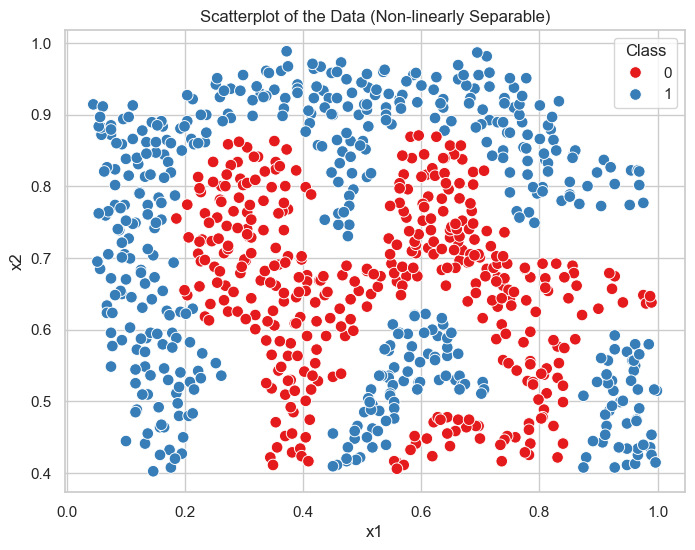

In [17]:


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette='Set1', s=70)
plt.title('Scatterplot of the Data (Non-linearly Separable)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(title='Class')
plt.show()


#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [18]:
from sklearn.svm import SVC

model_rbf = SVC(C=100, gamma=10, probability=True)


#### 5. Fit the classifier and get the score

In [19]:
model_rbf.fit(X, y)
score_rbf = model_rbf.score(X, y)
print(f"Accuracy con RBF kernel: {score_rbf:.2f}")


Accuracy con RBF kernel: 0.97


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

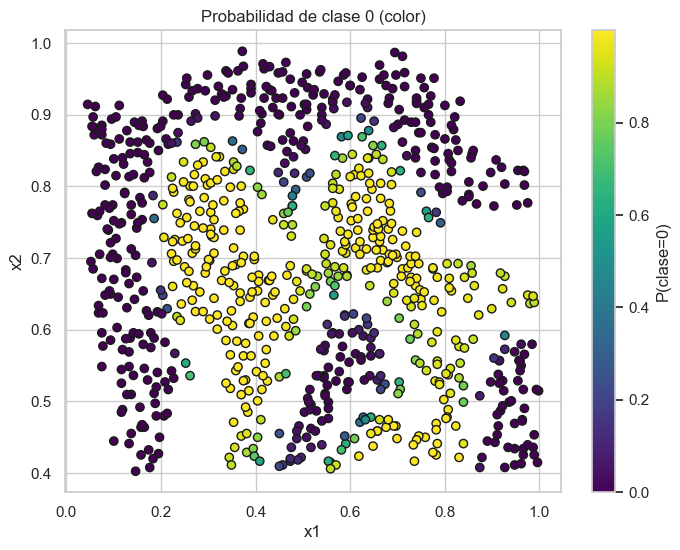

In [20]:
# Obtener las probabilidades de predicción para la clase 0
proba_class0 = model_rbf.predict_proba(X)[:, 0]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=proba_class0, cmap='viridis', edgecolors='k')
plt.colorbar(scatter, label='P(clase=0)')
plt.title('Probabilidad de clase 0 (color)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
